In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 41% 5.00M/12.3M [00:00<00:00, 33.5MB/s]
100% 12.3M/12.3M [00:00<00:00, 50.2MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random

In [3]:
shutil.copy("/content/nasa-cmaps.zip","/content/drive/MyDrive/")
! cp /content/drive/MyDrive/nasa-cmaps.zip /content/
! unzip nasa-cmaps.zip


Archive:  nasa-cmaps.zip
replace CMaps/Damage Propagation Modeling.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
data_train = pd.read_csv("/content/CMaps/train_FD004.txt",sep=" ",header=None)
data_test = pd.read_csv("/content/CMaps/test_FD004.txt",sep=" ",header=None)
data_RUL = pd.read_csv("/content/CMaps/RUL_FD004.txt",sep=" ",header=None)

train_copy = data_train
test_copy = data_test

In [5]:
data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [6]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_train.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [7]:
# Define a function to calculate the remaining useful life (RUL)
def add_rul(g):
    # Calculate the RUL as the difference between the maximum cycle value and the cycle value for each row
    g['RUL'] = max(g['cycles']) - g['cycles']
    return g

# Apply the add_rul function to the training data grouped by the unit ID
train = data_train.groupby('unit_ID').apply(add_rul)

In [8]:
train.head()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316


Text(0.5, 1.0, 'Number of Cycles for Engines')

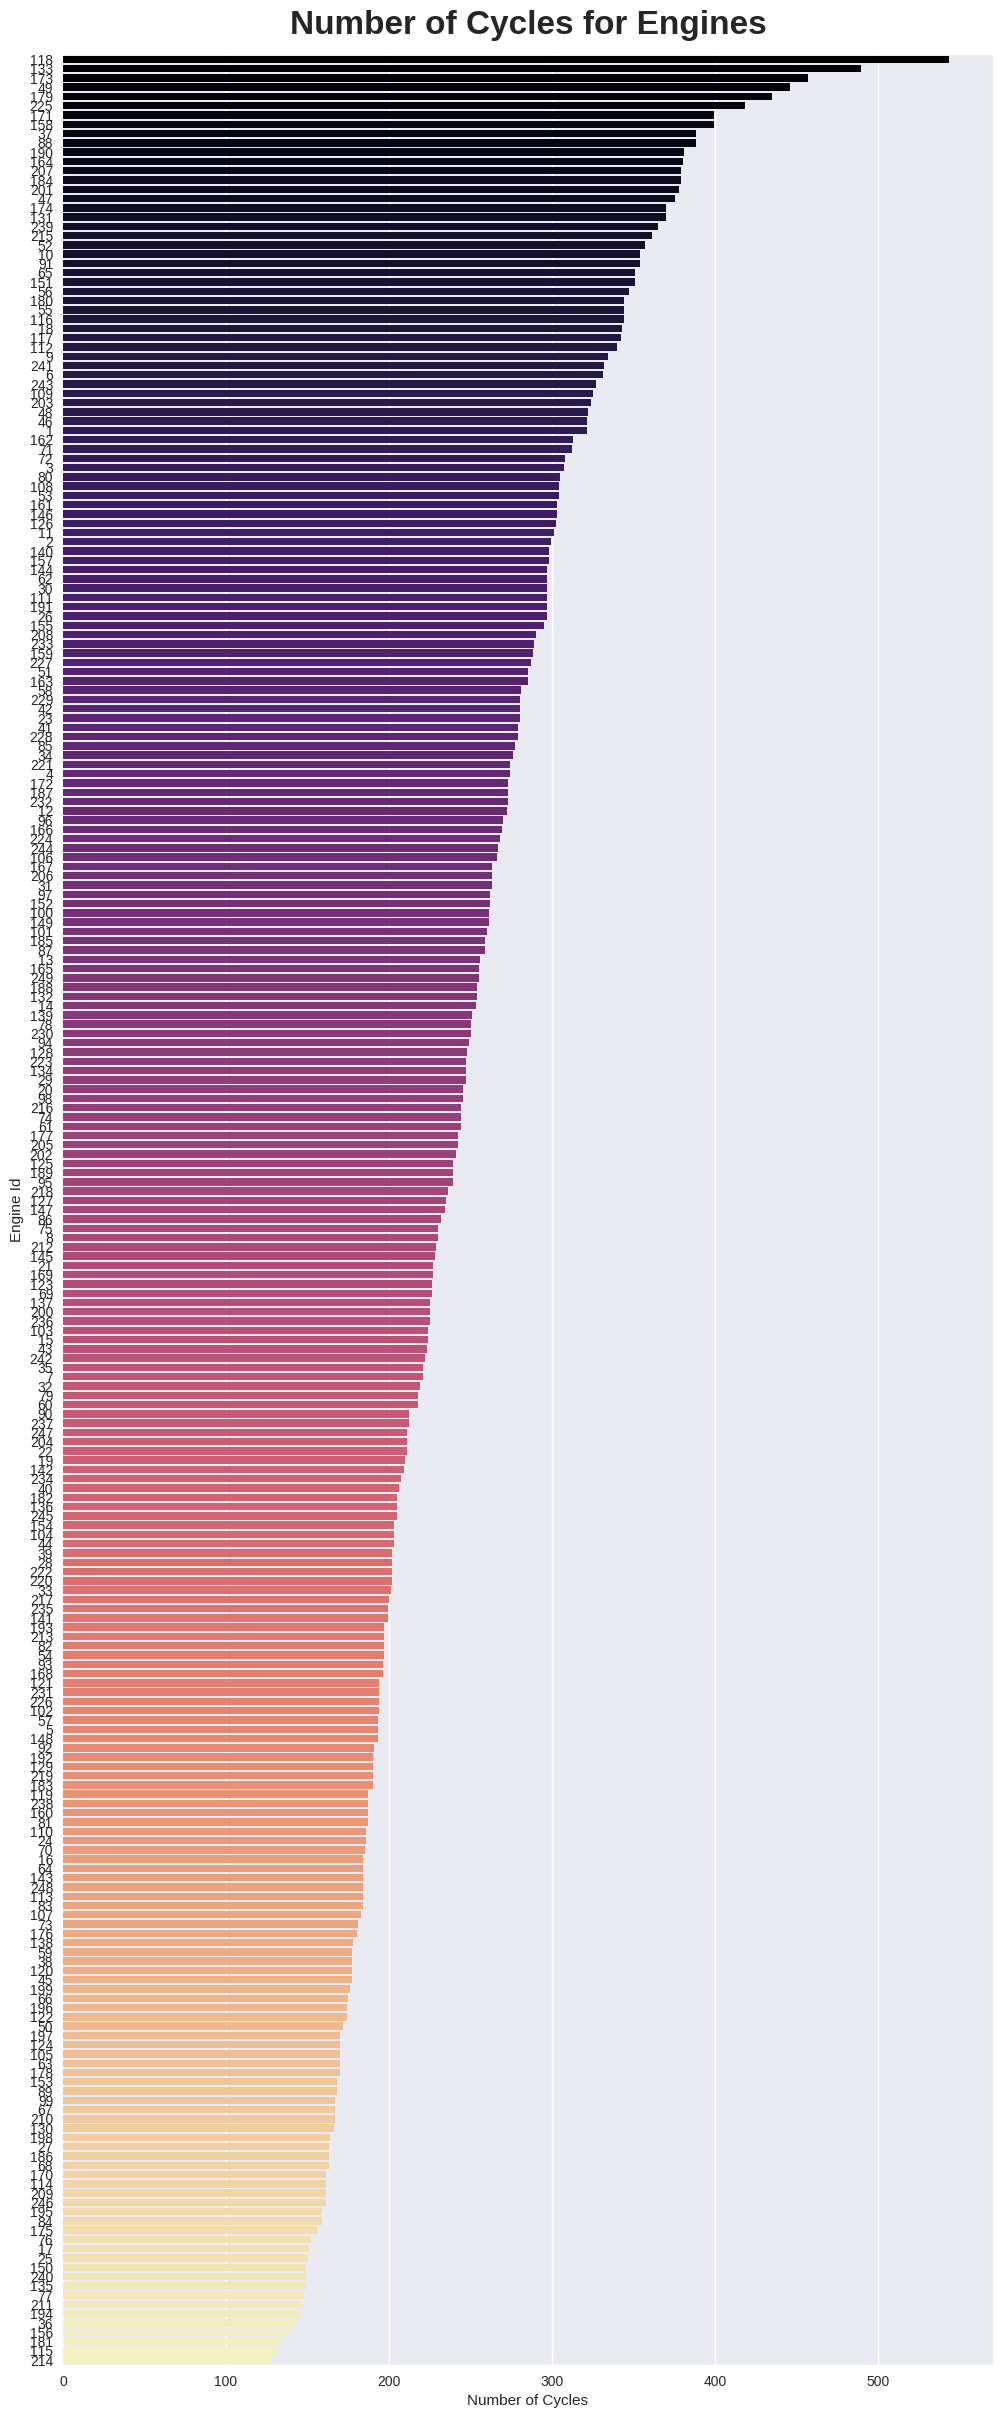

In [9]:
cnt_train = train[["unit_ID", "cycles"]].groupby("unit_ID").max().sort_values(by="cycles", ascending=False)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycles.values)

plt.style.use("seaborn")
plt.figure(figsize=(12, 30))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='magma')
plt.xlabel('Number of Cycles')
plt.ylabel('Engine Id')
plt.title('Number of Cycles for Engines', fontweight='bold', fontsize=24, pad=15)

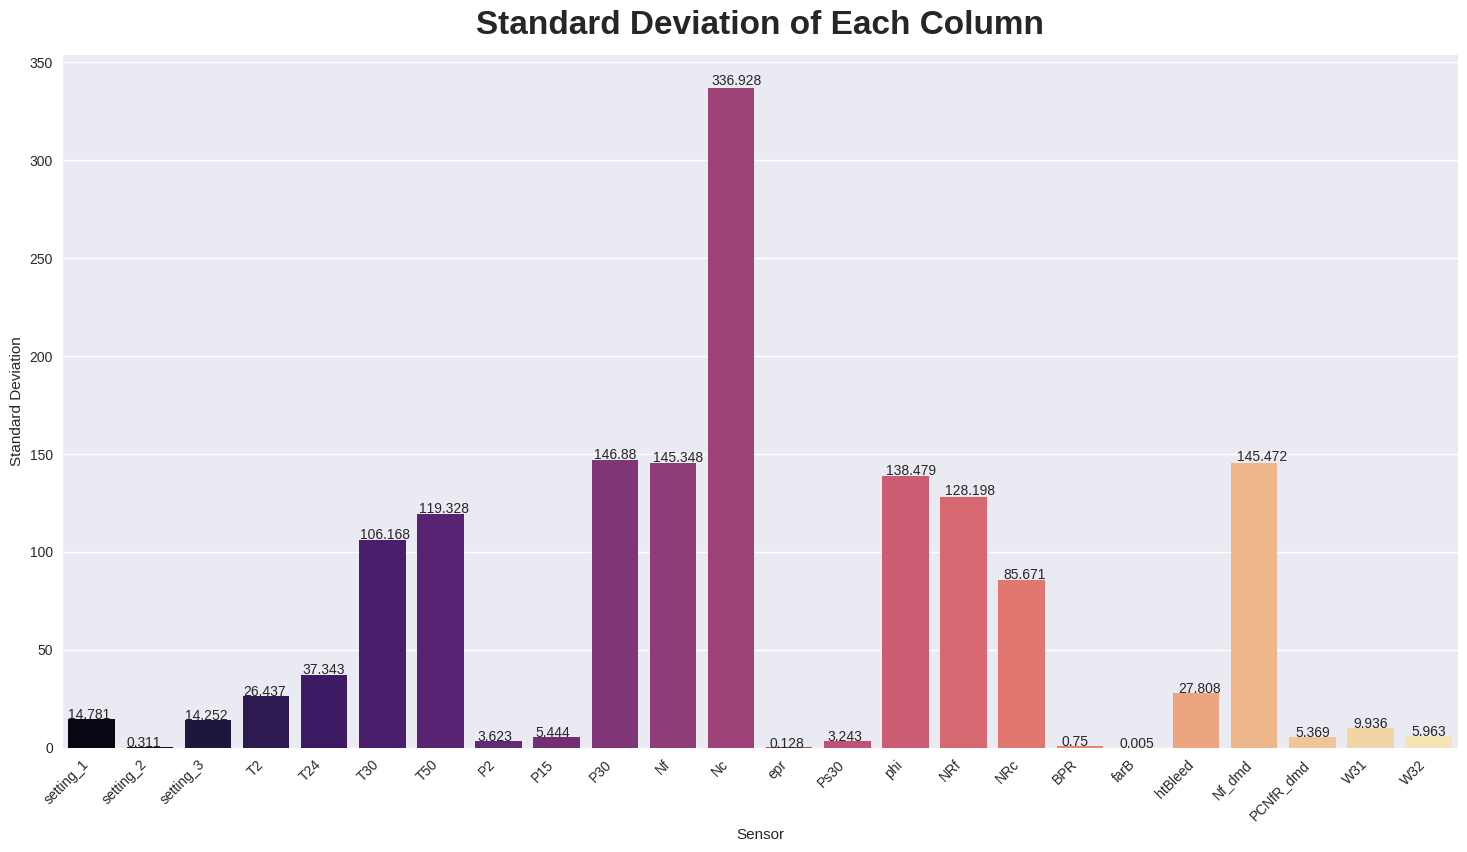

In [10]:
plt.figure(figsize=(18, 9))
subset_stats = data_train.agg(['mean', 'std']).T[2:]
ax = sns.barplot(x=subset_stats.index, y="std", data=subset_stats, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Sensor")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [11]:
train.drop(columns=['htBleed','PCNfR_dmd','P2','T2','setting_3','farB','epr'],inplace=True)
#columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr', 'farB', 'BPR', 'PCNfR_dmd']

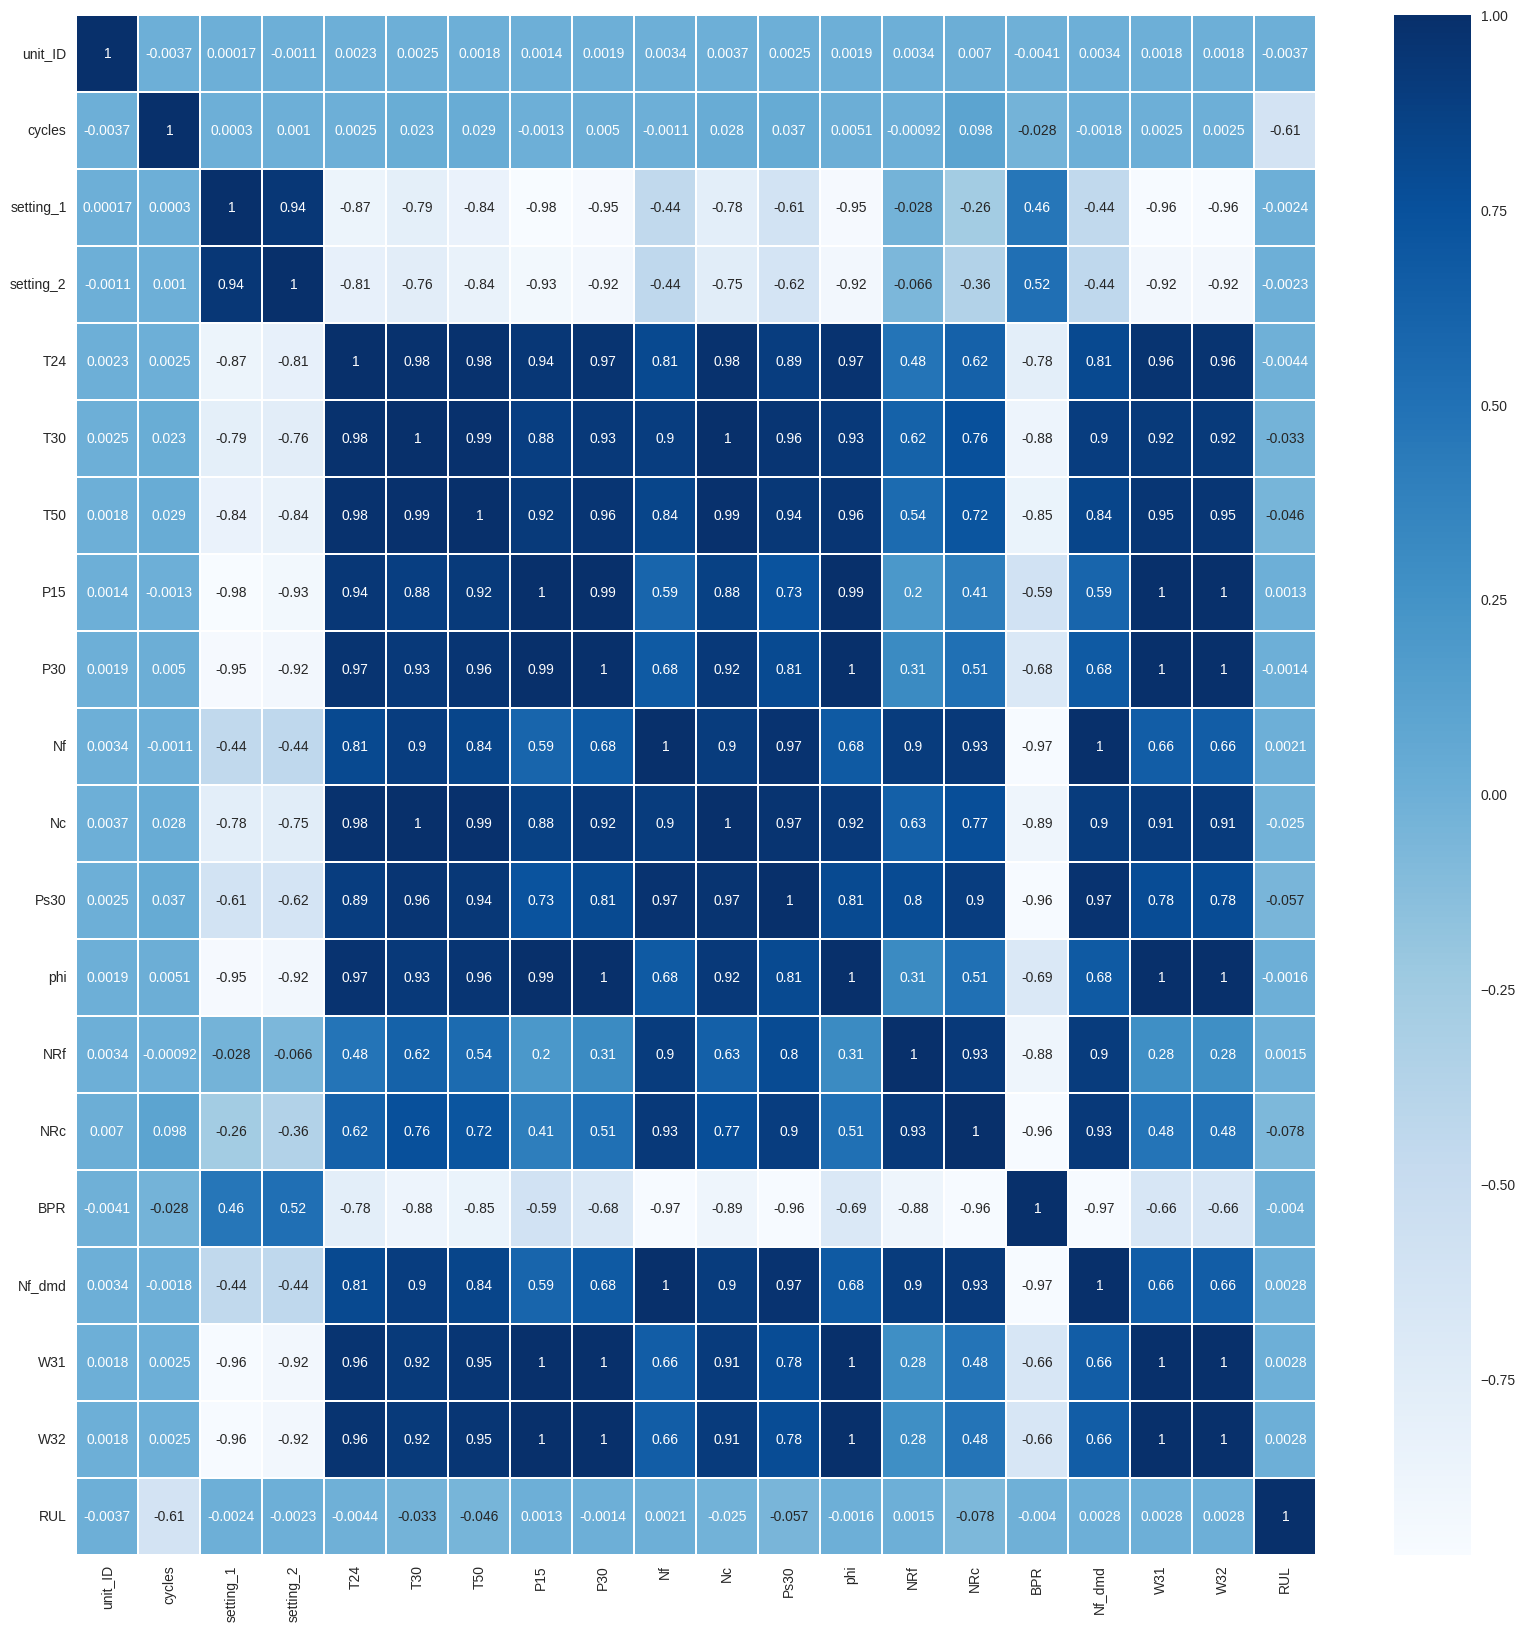

In [12]:
sns.heatmap(train.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [13]:
def process_targets(data_length, early_rul = None):
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))

In [14]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    num_batches = np.int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

In [15]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):

    max_num_test_batches = np.int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [16]:
test_data = pd.read_csv("/content/CMaps/test_FD004.txt", sep = "\s+", header = None,names=columns_train )
true_rul = pd.read_csv("/content/CMaps/RUL_FD004.txt", sep = '\s+', header = None)

window_length = 19
shift = 1
early_rul = 125
processed_train_data = []
processed_train_targets = []
num_test_windows = 5
processed_test_data = []
num_test_windows_list = []

columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15', 'epr',
                 'farB', 'htBleed', 'PCNfR_dmd']

train_data_first_column = data_train ["unit_ID"]
test_data_first_column = test_data["unit_ID"]

In [17]:
scaler = StandardScaler()
train_data = scaler.fit_transform(data_train.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

In [18]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.484824,-0.796416,-0.701412,-0.745729,-0.993802,-0.115765,-0.633237,-0.365205,-0.989007,0.417814,0.081921,0.063831,-0.114203,-1.030999,-1.031756
1,1.0,-1.473686,0.713666,0.562449,0.298212,0.332051,0.653429,0.560738,0.328498,0.331131,0.415786,-0.253086,-0.125677,0.655708,0.352814,0.358264
2,1.0,-1.462548,-0.815965,-0.704332,-0.711202,-0.988219,-0.115352,-0.646979,-0.374454,-0.990162,0.417658,-0.013912,0.153387,-0.114203,-1.045089,-1.022649
3,1.0,-1.451410,-0.822660,-0.722040,-0.702990,-0.989581,-0.115627,-0.630180,-0.368288,-0.988862,0.418048,0.096162,0.068362,-0.114203,-1.039051,-1.023269
4,1.0,-1.440272,-1.160079,-1.532181,-1.410627,-0.738762,-2.156673,-1.572260,-1.971512,-0.741097,-2.389666,-2.358027,2.066982,-2.155843,-0.687814,-0.644612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249.0,1.299678,0.693849,0.927441,0.950036,0.825587,0.625909,0.936371,0.988286,0.819078,0.423586,1.375959,-1.108128,0.621337,0.829852,0.839292
61245,249.0,1.310816,1.713871,1.705086,1.884363,1.935344,1.099327,1.758394,1.592578,1.937379,0.421480,1.373391,-1.417310,1.095657,1.863434,1.877707
61246,249.0,1.321954,1.720833,1.787974,1.916124,1.945216,1.099602,1.786324,1.654240,1.940195,0.421636,1.472259,-1.376797,1.095657,1.903690,1.896473
61247,249.0,1.333092,-0.633331,-0.344803,-0.450322,-0.567805,-0.033754,-0.359229,-0.106223,-0.569157,0.424366,0.675012,-0.311985,-0.038587,-0.564025,-0.577192


In [19]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-1.484824,0.729733,0.594757,0.217006,0.334911,0.653498,0.535154,0.294583,0.334308,0.416176,-0.219818,-0.083564,0.655708,0.346775,0.365895
1,1.0,-1.473686,-1.156865,-1.523327,-1.428310,-0.741213,-2.156742,-1.557420,-2.085587,-0.744708,-2.389588,-2.385341,2.102432,-2.155843,-0.654602,-0.661484
2,1.0,-1.462548,-0.808467,-0.732495,-0.804811,-0.993938,-0.115283,-0.650867,-0.417618,-0.987563,0.417502,0.038732,0.147123,-0.114203,-1.054147,-1.020100
3,1.0,-1.451410,-0.809538,-0.736545,-0.793246,-0.994687,-0.115558,-0.663867,-0.352872,-0.991173,0.417112,0.129313,0.098347,-0.114203,-1.037038,-1.053608
4,1.0,-1.440272,-0.651273,-0.610894,-0.704917,-0.615395,-0.041116,-0.574678,-0.479280,-0.613207,0.416878,-0.116515,0.023184,-0.038587,-0.605288,-0.601477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248.0,1.589267,-0.779813,-0.503892,-0.609632,-0.987130,-0.112393,-0.513299,-0.177134,-0.981136,0.421792,0.522917,0.209359,-0.114203,-1.040057,-1.049365
41210,248.0,1.600405,0.765350,0.723893,0.494145,0.350093,0.657351,0.694567,0.510402,0.344996,0.420466,0.221994,-0.011199,0.655708,0.348788,0.357157
41211,248.0,1.611543,-0.629314,-0.445023,-0.594548,-0.601915,-0.035199,-0.457619,-0.167885,-0.606419,0.422884,0.385529,0.150055,-0.038587,-0.621391,-0.617191
41212,248.0,1.622681,0.770438,0.670769,0.455344,0.339200,0.657075,0.677797,0.587480,0.342541,0.420778,0.203434,-0.017196,0.655708,0.359858,0.363883


In [20]:
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract training data with the specified window length.
    print(len(temp_train_data))
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets,
                                                                                window_length= window_length, shift = shift)

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

321
299
307
274
193
331
221
230
334
354
301
272
256
253
224
184
151
343
210
245
227
211
280
186
150
297
163
202
247
297
263
219
201
276
221
143
388
177
202
206
279
280
223
203
177
321
375
322
446
172
285
357
304
197
344
347
193
281
177
218
244
297
170
184
351
175
167
163
226
185
312
308
181
244
230
152
148
250
218
305
187
197
184
159
277
232
259
388
168
212
354
191
196
249
239
270
262
245
167
261
260
194
224
203
170
266
183
304
325
186
297
340
184
161
131
344
342
543
187
177
194
174
226
170
239
302
235
248
190
166
370
254
489
247
149
205
225
178
251
298
199
209
184
297
228
303
234
193
261
149
351
262
168
203
295
139
298
399
288
187
303
313
285
380
255
269
263
196
227
161
399
273
457
370
156
180
242
170
435
344
134
205
190
379
259
163
273
254
239
381
297
190
197
145
159
174
170
164
176
225
378
241
324
211
242
263
379
290
161
167
146
229
197
128
361
244
200
236
190
202
274
202
247
268
418
194
287
279
280
250
194
273
289
207
199
225
212
187
365
149
332
222
327
267
205
161
211
184
255


In [21]:
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values

    # Determine whether it is possible to extract test data with the specified window length.
    print(len(temp_test_data))
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")

    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift = shift,
                                                             num_test_windows = num_test_windows)

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

230
153
141
208
51
146
54
248
284
23
82
270
227
102
168
240
334
247
24
115
202
158
162
174
486
90
144
20
216
229
134
260
107
361
278
159
345
125
214
266
414
200
120
406
78
37
224
214
273
206
137
58
67
81
103
180
121
185
37
135
396
240
158
251
186
97
150
241
162
190
292
118
149
223
203
48
108
106
184
112
60
146
274
88
174
254
167
140
285
118
144
116
200
105
110
123
51
82
237
196
166
443
145
65
351
148
121
145
66
348
342
88
132
218
82
161
97
178
228
170
194
117
236
230
21
220
98
139
315
107
193
115
74
266
435
56
291
239
88
160
19
69
327
34
102
84
116
126
320
202
285
195
130
122
161
28
138
171
160
122
257
99
122
29
178
63
99
74
34
48
355
132
151
135
116
185
146
279
262
367
199
98
125
154
203
47
121
157
107
200
71
203
263
214
186
70
196
115
177
115
139
222
87
19
95
291
179
180
171
135
206
261
288
102
72
264
141
63
110
65
176
178
305
152
39
59
62
126
20
157
230
370
111
179
362
176
221
177
28
204
42
112
199
184
63
29
94
281


In [22]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (56767, 19, 15)
Processed training ruls shape:  (56767,)
Processed test data shape:  (1224, 19, 15)
True RUL shape:  (248,)


In [23]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (45413, 19, 15)
Processed validation data shape:  (11354, 19, 15)
Processed train targets shape:  (45413,)
Processed validation targets shape:  (11354,)


In [24]:
def create_compiled_model():
    model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 15), return_sequences=True, activation = "tanh"), # 15 is the number of columns
        layers.LSTM(64, activation = "tanh", return_sequences = True),
        layers.LSTM(32, activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

In [25]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
355/355 - 56s - loss: 2463.9187 - val_loss: 1708.9424 - lr: 0.0010 - 56s/epoch - 158ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
355/355 - 45s - loss: 1694.0541 - val_loss: 1652.2582 - lr: 0.0010 - 45s/epoch - 127ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
355/355 - 46s - loss: 728.3690 - val_loss: 480.4804 - lr: 0.0010 - 46s/epoch - 131ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
355/355 - 43s - loss: 428.7453 - val_loss: 427.6233 - lr: 0.0010 - 43s/epoch - 121ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
355/355 - 47s - loss: 381.3196 - val_loss: 377.6360 - lr: 0.0010 - 47s/epoch - 131ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
355/355 - 47s - loss: 344.8708 - val_loss: 327.9114 - lr: 0.0010 - 47s/epoch - 131ms/step

Epoch

In [26]:
def scheduler(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.00001
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)
model = create_compiled_model()
history = model.fit(processed_train_data, processed_train_targets, epochs = 20,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
355/355 - 62s - loss: 2533.5562 - val_loss: 1708.7988 - lr: 0.0010 - 62s/epoch - 174ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
355/355 - 56s - loss: 1198.4404 - val_loss: 520.3048 - lr: 0.0010 - 56s/epoch - 158ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
355/355 - 45s - loss: 428.6037 - val_loss: 410.2548 - lr: 0.0010 - 45s/epoch - 127ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
355/355 - 45s - loss: 373.8549 - val_loss: 383.5064 - lr: 0.0010 - 45s/epoch - 127ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/20
355/355 - 46s - loss: 346.6189 - val_loss: 375.5396 - lr: 0.0010 - 46s/epoch - 131ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/20
355/355 - 43s - loss: 319.6095 - val_loss: 316.9431 - lr: 0.0010 - 43s/epoch - 122ms/step

Epoch 

In [27]:
rul_pred = model.predict(processed_test_data).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

39/39 [==============================] - 3s 27ms/step
RMSE:  31.64432781748189


In [28]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  32.308833085705466


In [29]:
def compute_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = compute_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

S-score:  16045.25740271358


In [30]:
r2 = r2_score(true_rul, preds_for_last_example)
print("R2-Score: ", r2)

R2-Score:  0.6488679910252908


In [35]:
true_rul

array([ 22,  39, 107,  75, 149,  78,  94,  14,  99, 162, 143,   7,  71,
       105,  12, 160, 162, 104, 194,  82,  91,  11,  26, 142,  39,  92,
        76, 124,  64, 118,   6,  22, 147, 126,  36,  73,  89,  11, 151,
        10,  97,  30,  42,  60,  85, 134,  34,  45,  24,  86, 119, 151,
       142, 176, 157,  67,  97,   8, 154, 139,  51,  33, 184,  46,  12,
       133,  46,  46,  12,  33,  15, 176,  23,  89, 124, 163,  25,  74,
        78, 114,  96,  10, 172, 166, 115,  70,  94,  56,  86,  96,  50,
        73, 154, 129, 171,  71, 105, 113,  37,   7,  13,  22,   9, 120,
       100, 107,  41, 153, 126,  59,  18,  66,  13,  14, 139,  13,  75,
         8, 109, 137,  41, 192,  23,  86, 184,  15, 195, 126, 120, 165,
       101, 116, 126,  36,   7, 122, 159,  88, 173, 146, 130, 108,  53,
       162,  59, 100,  56, 145,  76,  57,  31,  88, 173,  34,   7, 133,
       172,   6,  22,  83,  82,  84,  95, 174, 111,  72, 109,  87, 179,
       158, 126,  12,   8,  10, 123, 103,  12, 106,  12,  32,  3

In [36]:
np.rint(preds_for_last_example)

array([ 75.,  62., 112., 112., 120., 120., 122.,  12., 101., 124., 123.,
        11.,  69., 107.,  21., 118.,  74.,  79., 126.,  79., 111.,  18.,
        39., 108.,  57., 104.,  75., 125., 103., 113.,  11.,  21., 121.,
       118.,  37.,  76.,  77.,  10.,  71.,  16., 121.,  22.,  71.,  37.,
       109., 122.,  41.,  52.,  21., 113., 123., 125., 122.,  98., 121.,
       116., 118.,   8., 124., 111.,  23.,  51., 116.,  61.,  24.,  73.,
        39.,  45.,   9.,  51.,  27., 121.,  40., 121., 108., 123.,  66.,
       100.,  78.,  93., 119.,  17., 118., 124., 113., 102., 114., 122.,
        62.,  75.,  45.,  83., 120., 121., 114.,  59., 120., 117.,  94.,
        16.,  10.,  19.,  18., 125.,  75.,  52., 118., 123., 123.,  78.,
        21., 101.,  15.,  28., 115.,   7., 115.,  12.,  68., 121.,  29.,
       124.,  47.,  75., 125.,  27., 123., 118., 121.,  90.,  76.,  78.,
       125.,  60.,   4., 113.,  69., 115., 125.,  51., 126., 123.,  53.,
       126.,  94., 122.,  73., 121.,  79.,  57.,  2

In [37]:
preds_for_last_example

array([ 74.920135 ,  62.446335 , 112.2906   , 112.27318  , 119.96075  ,
       119.52377  , 121.67368  ,  12.366019 , 100.745186 , 123.80901  ,
       122.74862  ,  10.99275  ,  68.83709  , 106.7252   ,  20.623983 ,
       118.151535 ,  73.896095 ,  78.74851  , 125.83364  ,  78.67068  ,
       111.310104 ,  18.10151  ,  38.80004  , 108.39828  ,  56.643784 ,
       103.67357  ,  74.83283  , 124.9214   , 103.17112  , 113.46915  ,
        11.498677 ,  20.75882  , 121.24191  , 118.08465  ,  36.901344 ,
        76.02589  ,  76.82158  ,   9.972104 ,  71.35746  ,  15.944878 ,
       120.988594 ,  22.316383 ,  70.540565 ,  37.217453 , 108.90214  ,
       122.104485 ,  40.738785 ,  52.076767 ,  21.473957 , 113.47643  ,
       123.45149  , 125.06492  , 122.21403  ,  97.944885 , 121.115295 ,
       116.12239  , 117.70283  ,   7.8799934, 123.59056  , 110.62917  ,
        22.7996   ,  51.341816 , 115.99912  ,  60.85513  ,  23.5038   ,
        72.66283  ,  38.92621  ,  44.62102  ,   9.099387 ,  51.2

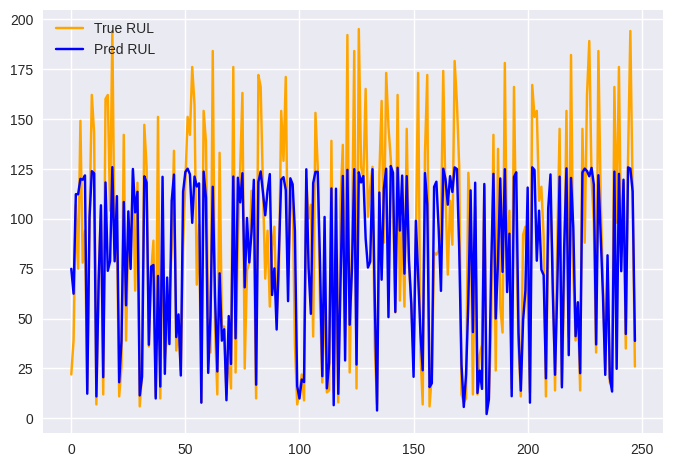

In [38]:
plt.plot(true_rul, label = "True RUL", color = "orange")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()